In [4]:
# Importing Libraries requires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [5]:
# Confirming if they have been loaded
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version:", matplotlib.__version__)

NumPy version: 2.3.1
Pandas version: 2.3.1
Seaborn version: 0.13.2
Matplotlib version: 3.10.3


# Game Sales Analysis

In this project, I am exploring global video game sales data which i got from Kaggle. This is a project I did to implement what I leant. The aim to to identify trends in platform popularity, top publishers, regional sales, and how genres have evolved over time.


In [6]:
# Importing dataset
games_sales = pd.read_csv('vgsales.csv')
# Checking the data 
games_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
# Checking the info of the data set. This is useful to  understand the data set additionally it gives you and overview of each column null values

games_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
games_sales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
# Checking how many null values each column
games_sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
# Checking for duplicates
games_sales.duplicated().sum()

np.int64(0)

In [11]:
games_sales[games_sales['Year'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [12]:
games_sales[games_sales['Publisher'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42


In [13]:
# Filling the missing values in 'Publisher' column with 'Unknown'
games_sales['Publisher'] = games_sales['Publisher'].fillna('Unknown')

In [14]:
#Filling the missing values in 'Year' column with 0
games_sales['Year'] = games_sales['Year'].fillna(0)

In [15]:
#Confirming if the missing values have been filled
games_sales.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [16]:
# Display rows where the 'Year' column was originally missing (now set to 0)
# This helps us assess whether these rows contain useful data or should be excluded from time-based analysis
games_sales[games_sales['Year'] == 0]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,0.0,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,0.0,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,0.0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,0.0,Fighting,Unknown,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,0.0,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,0.0,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,0.0,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,0.0,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,0.0,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


These rows had missing values in the 'Year' column, which were filled with 0. Since the games themselves and their sales data are valid, we'll keep them in the dataset but exclude them from any time-based visualisations.


In [17]:
# Create a new DataFrame excluding Year == 0. This will be useful for time plot
games_sales_cleaned = games_sales[games_sales['Year']!=0]

In [18]:
# Confirming that the new dataset (games_sales_cleaned) excludes any rows where Year == 0
games_sales_cleaned['Year'].min()

np.float64(1980.0)

In [19]:
games_sales_cleaned['Year'].max()

np.float64(2020.0)

We're confirming that the filtered dataset games_sales_cleaned no longer contains any rows where `Year` was originally missing (now represented as 0). This ensures the dataset is ready for any time-based analysis or visualisation.

In [20]:
games_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


### The Industry over Time

#### Total Global Sales Over Time:
The line chart shows how total global video game sales have changed over the years. It helps us understand the industry's growth, peaks, and overall lifecycle.¶

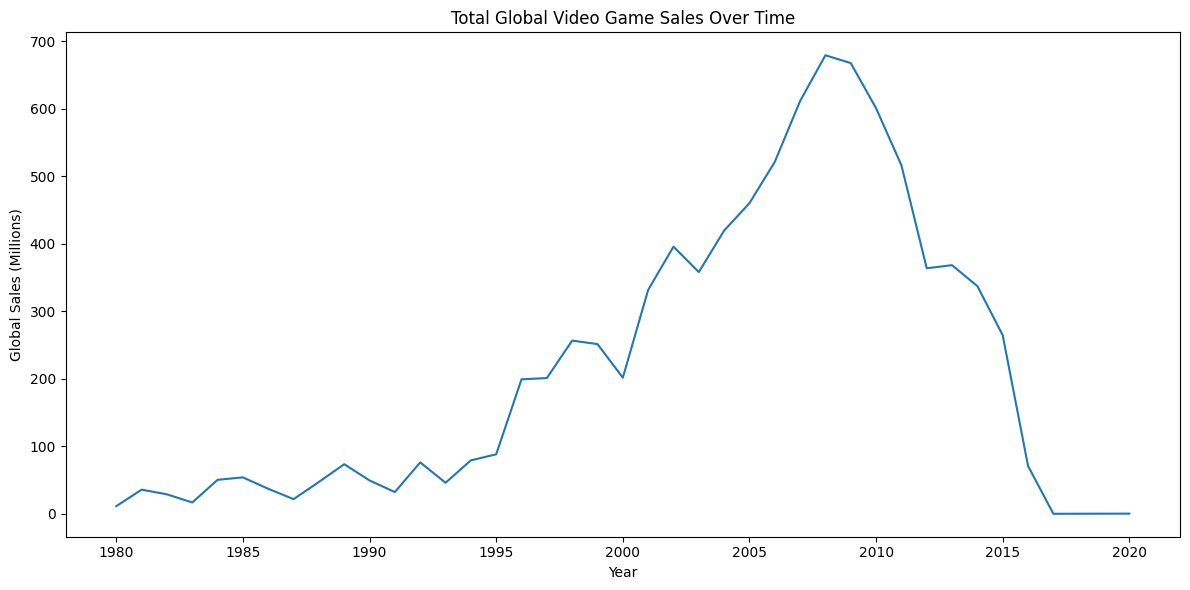

In [61]:
# Grouping the data by 'Year' and summing up 'Global_Sales' to get total sales per year
sales_by_year = games_sales_cleaned.groupby('Year')['Global_Sales'].sum().reset_index()

# Plotting the total global sales per year as a line chart
plt.figure(figsize=(12,6))
sns.lineplot(data=sales_by_year, x='Year', y='Global_Sales')

# Adding title and axis labels for clarity

plt.title('Total Global Video Game Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.tight_layout()

#### Total Video Game Sales by Region:

The bar chart breaks down total video game sales by region, helping us identify key markets and understand where most customers are located.

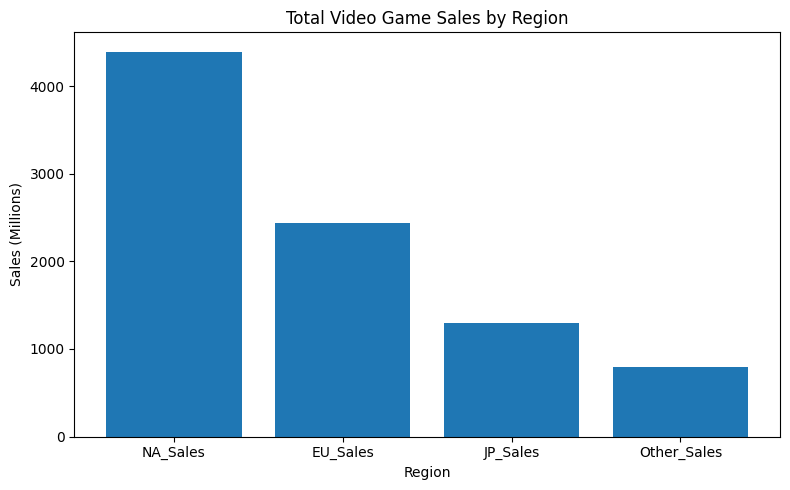

In [62]:
# Creating a new DataFrame 'regional_sales' that sums total sales by region
regional_sales = games_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
# Renaming the columns for clarity
regional_sales.columns = ['region', 'total_sales']

# Plotting a bar chart of total video game sales by region
plt.figure(figsize=(8,5))
plt.bar(regional_sales.region, regional_sales.total_sales)
# Labeling the bar chart
plt.title('Total Video Game Sales by Region')
plt.ylabel('Sales (Millions)')
plt.xlabel('Region')
plt.tight_layout()

#### Regional Video Game Sales over Years:
The line chart illustrates how video game sales in different regions have evolved over the years, highlighting the varying growth trends across key markets.

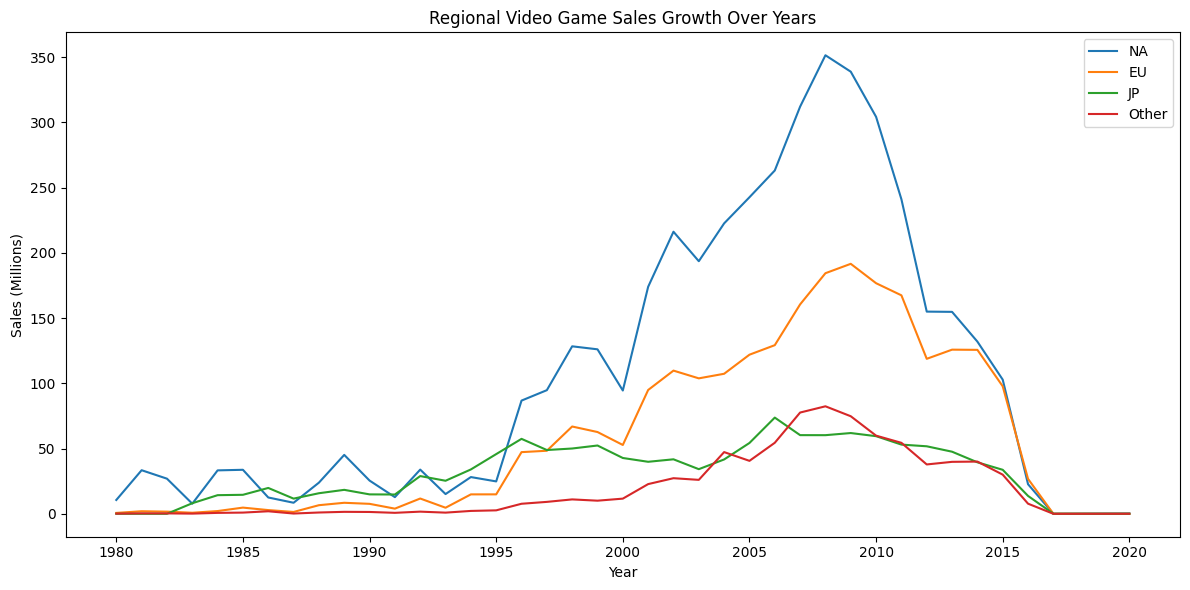

In [64]:
# Creating a new DataFrame for regional sales over the years
regional_sales_years = games_sales_cleaned.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()



# Plotting the graph
plt.figure(figsize=(12,6))
plt.plot(regional_sales_years['Year'], regional_sales_years['NA_Sales'], label='NA')
plt.plot(regional_sales_years['Year'], regional_sales_years['EU_Sales'], label='EU')
plt.plot(regional_sales_years['Year'], regional_sales_years['JP_Sales'], label='JP')
plt.plot(regional_sales_years['Year'], regional_sales_years['Other_Sales'], label='Other')
plt.title('Regional Video Game Sales Growth Over Years')
plt.xlabel('Year')
plt.ylabel('Sales (Millions)')
plt.legend()
plt.tight_layout()

### Market Breakdown

#### Global Sales by Genre:
The Barchart shows popularity of genres reflects player preferences and helps us understand customer segments and market demand.

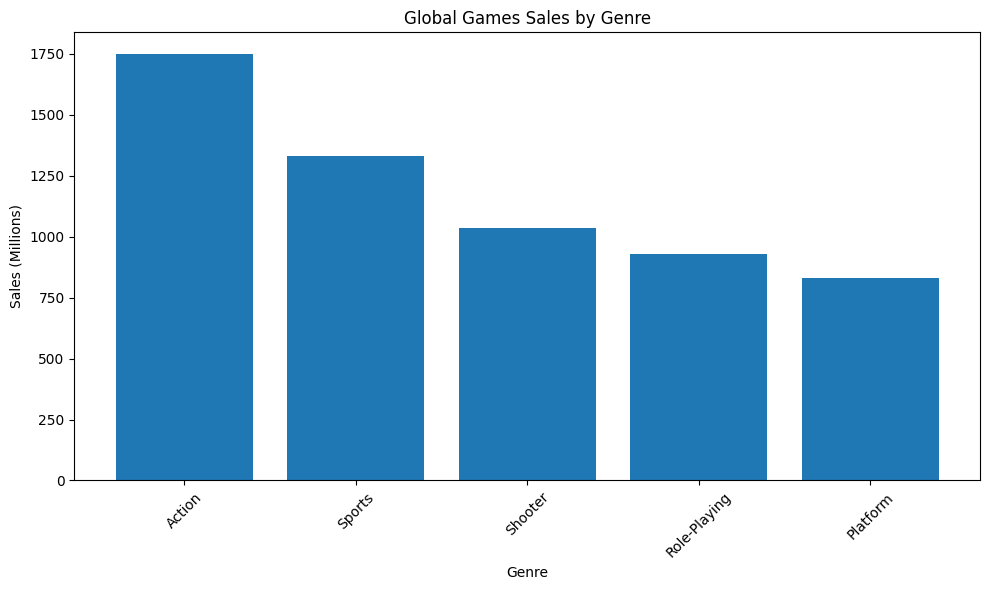

In [65]:
# Sales by Genre
sales_by_genre = games_sales.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).reset_index().head(5)

# Plotting a bar chart of global games sales by genre
plt.figure(figsize=(10,6))
plt.bar(sales_by_genre.Genre, sales_by_genre.Global_Sales)

# Labeling the bar chart
plt.title('Global Games Sales by Genre')
plt.ylabel('Sales (Millions)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()

#### Total Global Sales by Platform
The Barchart shows platform sales indicate which gaming hardware is most popular, providing insight for developers on where to focus their game releases.

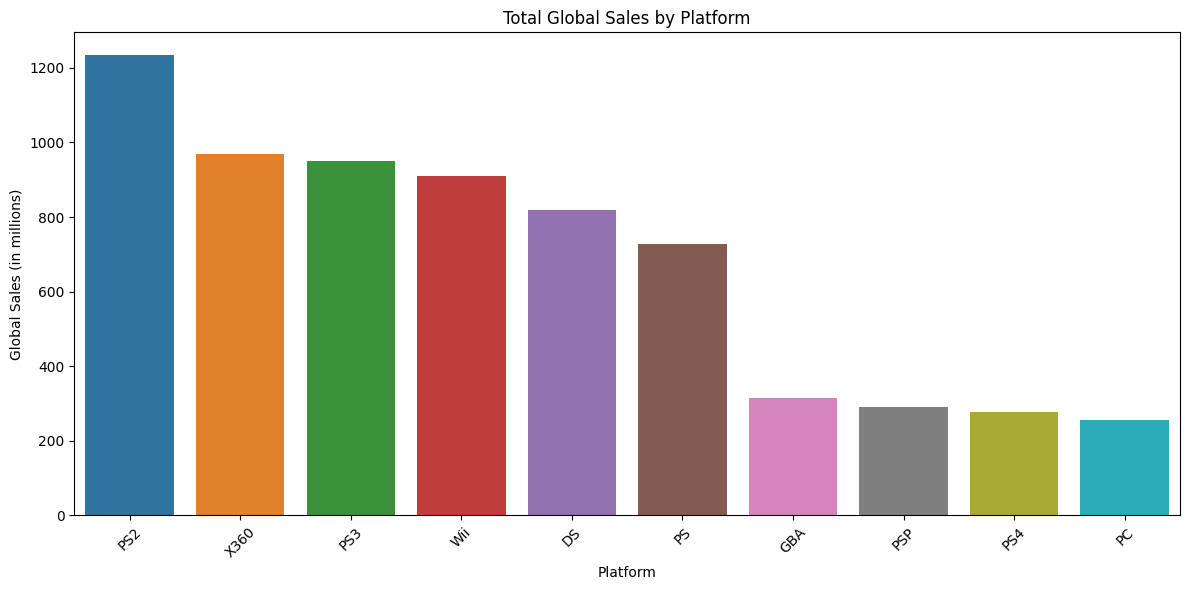

In [70]:
# Grouping by top 10 platform and summing the global sales
platform_sales = games_sales_cleaned.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=platform_sales, x='Platform', y='Global_Sales', hue='Platform')
plt.title('Total Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()

#### Top 5 Publisher
The Barchart highlights the top publishers in the market, helping us understand the key competitors driving global sales.

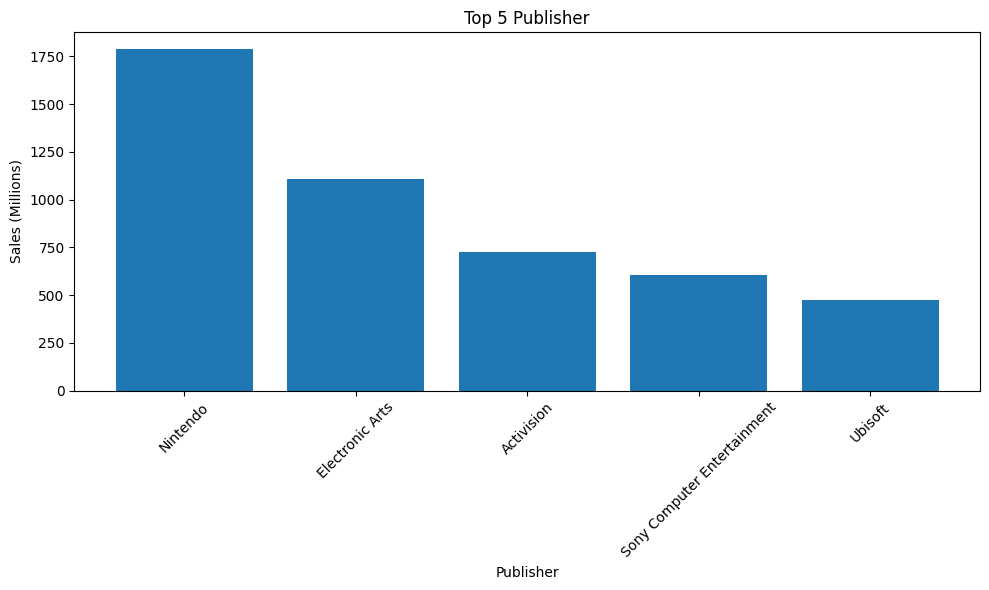

In [71]:
# Top 5 Publisher
sales_by_publisher = games_sales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).reset_index().head(5)
sales_by_publisher

# Plotting a bar chart of global games sales by publisher
plt.figure(figsize=(10,6))
plt.bar(sales_by_publisher.Publisher, sales_by_publisher.Global_Sales)

# Labeling the bar chart
plt.title('Top 5 Publisher')
plt.ylabel('Sales (Millions)')
plt.xlabel('Publisher')
#Rotating the text as text was overlapping
plt.xticks(rotation=45)
plt.tight_layout()


#### Global Sales by Publisher and Genre
The heatmap reveals how top publishers distribute their sales across different genres, providing insight into their market focus and strengths.

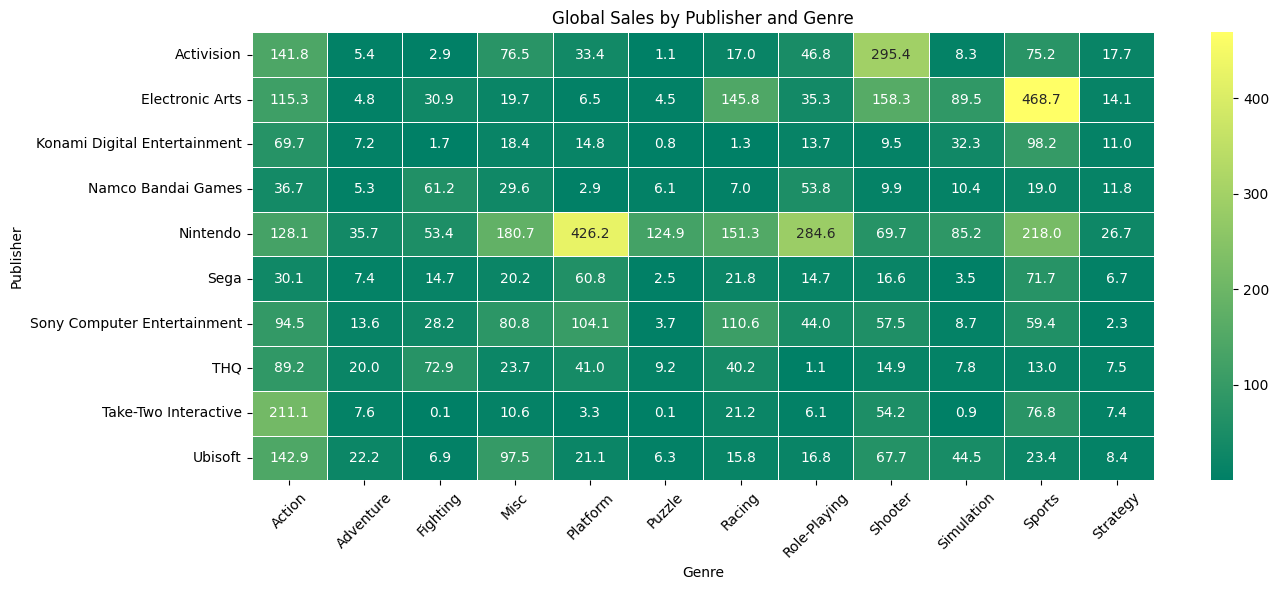

In [39]:
# Group data by Publisher and Genre to get total global sales for each combination
publisher_genre_sales = games_sales_cleaned.groupby(['Publisher', 'Genre'])['Global_Sales'].sum().reset_index()

# Pivot data to have Publishers as rows and Genres as columns for heatmap visualization
heatmap_data = publisher_genre_sales.pivot(index='Publisher', columns='Genre', values='Global_Sales')

# Filter to top 10 publishers by total global sales to keep heatmap focused and readable
top_publishers = games_sales_cleaned.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10).index
heatmap_data = heatmap_data.loc[heatmap_data.index.isin(top_publishers)]

# Plotting heatmap with annotations showing sales values
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='summer', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Global Sales by Publisher and Genre')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Deeper Analysis

#### Top 10 Games
Th Barchart highlights the blockbuster hits that have driven the most sales globally, illustrating which individual games have had the greatest commercial impact.

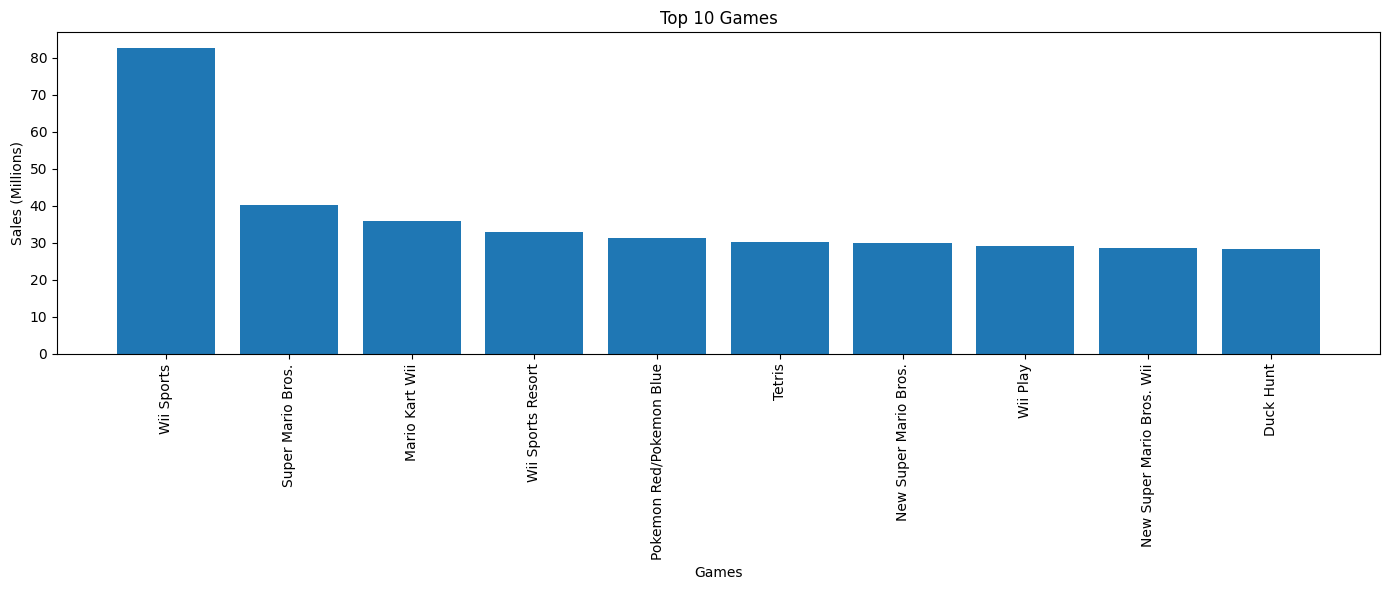

In [72]:
# Sorting the dataset to get top 10 games by global sales
top_10_games = games_sales_cleaned.sort_values(by='Global_Sales', ascending=False).head(10)
top_10_games

# Plotting a bar chart of the top 10 games by global sales
plt.figure(figsize=(14,6))
plt.bar(top_10_games.Name, top_10_games.Global_Sales)

# Labeling the bar chart
plt.title('Top 10 Games')
plt.ylabel('Sales (Millions)')
plt.xlabel('Games')
#Rotating the text as text was overlapping
plt.xticks(rotation=90)
plt.tight_layout()

#### Game Sales by Genre Over Years
The heatmap visualizes how sales for different game genres have evolved over the years, revealing trends and shifts in player preferences.


/var/folders/59/q9gfgqyd6n973z883c0h_mym0000gn/T/ipykernel_11852/1766550055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_sales_cleaned['Year'] = games_sales_cleaned['Year'].astype(int)


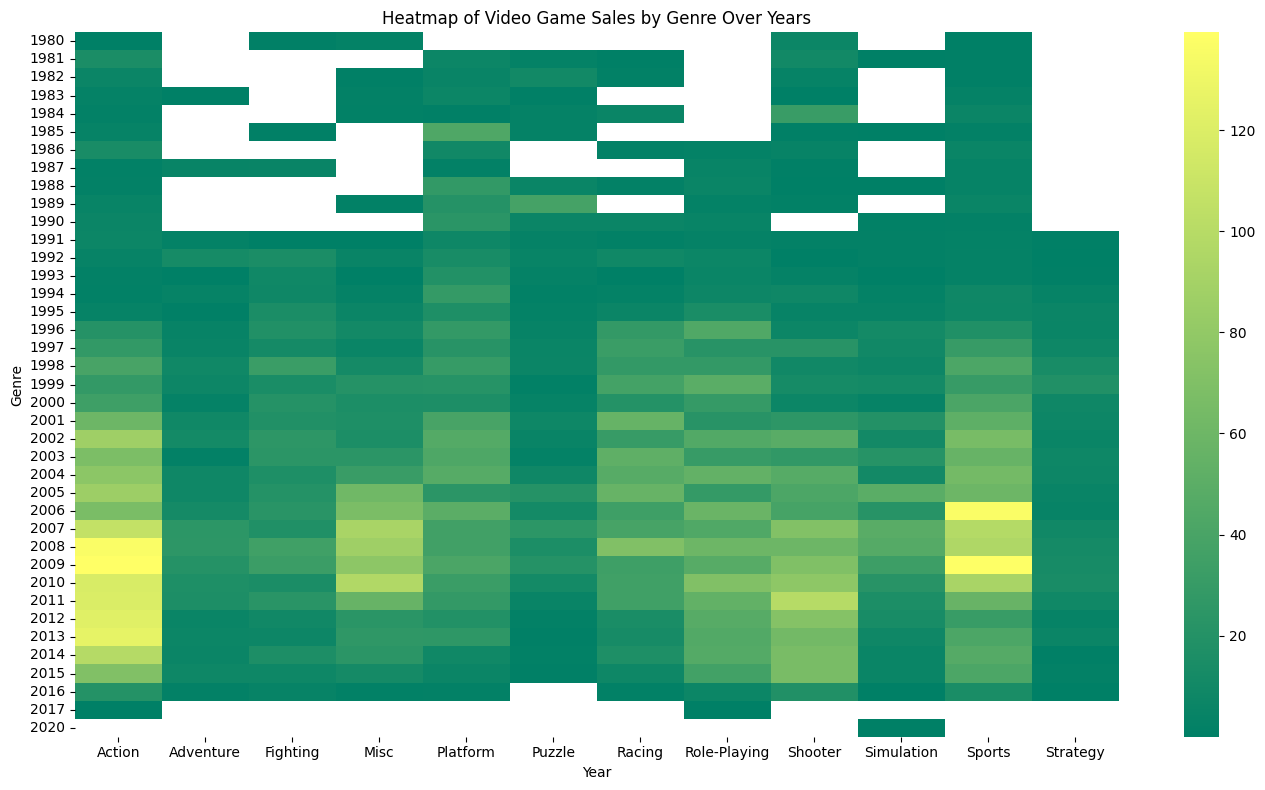

In [81]:
# Converting Year in integer format for better readability on the heatmap
games_sales_cleaned['Year'] = games_sales_cleaned['Year'].astype(int)

#Group data by 'Year' and 'Genre', summing the 'Global_Sales' to get total sales per genre each year
genre_over_years = games_sales_cleaned.groupby(['Year', 'Genre'])['Global_Sales'].sum().sort_values(ascending=False).reset_index()
genre_over_years

#Pivot the DataFrame to have years as rows and genres as columns for the heatmap
pivot_df = genre_over_years.pivot(index='Year', columns='Genre', values='Global_Sales')

#Sort the years in ascending order for a natural timeline flow
pivot_df = pivot_df.sort_index(ascending=True)

# Ploting heatmap to visualize how the popularity of each genre has changed over time
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, cmap='summer')

plt.title('Heatmap of Video Game Sales by Genre Over Years')
plt.xlabel('Year')
plt.ylabel('Genre')
plt.tight_layout()


#### Summary



| **KPI**                        | **Value**           |
|-------------------------------|---------------------|
| Top Selling Game              | Wii Sports          |
| Top Publisher                 | Nintendo   |
| 
| Most Popular Platform         | PS2       |
| Most Popular Genre (All Time) | Action              |
| Sales Trend Post-2010         | Declining           |
| Highest Region

